### Introduction to Machine Learning


### What is EMR( Emperical Risk Minimization)?

It is a very fancy sounding name for a very simple concept. 

Supervised learning can usually be seen as picking one function f from a set of possible functions F.
An obvious questions is, how can we tell a good function f from a bad one? 




<img src="./emr1.jpg">

source: Empirical Risk Minimization and Optimization(cs.umass.edu)

<img src="./emr2.jpg">

source: Wikipedia

### AI vs ML vs DL ( 20 minutes)

This is a confusion many students and even DS Practitioners have. Basically. These terms overlap but how are the similar or dissimilar is something that needs clarification.

#### AI
As the name suggests, artificial intelligence can be loosely interpreted to mean incorporating human intelligence to machines.

Artificial intelligence is the broader concept that consists of everything from Good Old-Fashioned AI (GOFAI) all the way to futuristic technologies such as deep learning.

Whenever a machine completes tasks based on a set of stipulated rules that solve problems (algorithms), such an “intelligent” behavior is what is called artificial intelligence.

For example, such machines can move and manipulate objects, recognize whether someone has raised the hands, or solve other problems.

#### ML
As the name suggests, machine learning can be loosely interpreted to mean empowering computer systems with the ability to “learn”.

The intention of ML is to enable machines to learn by themselves using the provided data and make accurate predictions.

ML is a subset of artificial intelligence; in fact, it’s simply a technique for realizing AI.

It is a method of training algorithms such that they can learn how to make decisions.

Training in machine learning entails giving a lot of data to the algorithm and allowing it to learn more about the processed information.

For example, here is a table that identifies the type of fruit based on its characteristics:


| Weight | Texture | Type of Fruit |
| --- | --- | --- |
| 155 | Rough |Orange  |
| 180 | Rough |Orange  |
| 135 | Smooth |Apple  |
|110  | Smooth | Apple |
| 120 | Smooth | ? |


#### Deep Learning
 deep learning is a subset of ML; in fact, it’s simply a technique for realizing machine learning. In other words, DL is the next evolution of machine learning.
 
DL algorithms are roughly inspired by the information processing patterns found in the human brain.
Just like we use our brains to identify patterns and classify various types of information, deep learning algorithms can be taught to accomplish the same tasks for machines.

The brain usually tries to decipher the information it receives. It achieves this through labelling and assigning the items into various categories.
Whenever we receive a new information, the brain tries to compare it to a known item before making sense of it — which is the same concept deep learning algorithms employ.
For example, artificial neural networks (ANNs) are a type of algorithms that aim to imitate the way our brains make decisions.

source: https://towardsdatascience.com/clearing-the-confusion-ai-vs-machine-learning-vs-deep-learning-differences-fce69b21d5eb

In [ ]:
### Types of Machine Learning:


## Differences between errors.

the Empirical Risk Minimization (ERM), is an algorithm to find the best predictor from all possible predictors that your hypothesis function represents.

Every predictor h has it’s empirical error Ls(h), that is the error that you do using the training data, and the test error Ld(h) that is the error that you do with the unseen data. 

So the ERM paradigm find the predictor of your set of hypothesis that minimize the Empirical error. Now taking the ERM predictor hs, we can decompose the test error of it in two parts:

<img src = './EMR3.jpg'>

The first term is the approximation error and intuitively, the richer our class of hypotheses the lower is this error. 

But on the other hand the richer our class of hypotheses the higher is the estimation error, so there is this bias-complexity trade-off. 

Intuitively if we have many many predictors in our hypothesis class we will have a greater probability of finding the best predictor with the ERM algorithm; we will find an excellent predictor that perfectly describes the data of the training set, therefore, what we are doing is overestimating our problem, ie we are doing overfitting. 

On the other hand, if we restrict our hypothesis class to much we are underestimating our problem and we are doing underfitting, so that’s the bias trade-off.

<img src = './EMR4.jpg'>

[source: https://medium.com/@francescomandru/the-power-of-boosting-in-ml-3bfdf4ab9806 ]

#### To Summarize:
The hypothesis function you selected which has minimal risk will have 2 errors:
1. approximation error
2. estimation error
3. balancing these 2 errors will help in achieving a better generalized model which performs okay on all data(seen and unseen).This is also known as the <b> Bias-Variance Tradeoff</b>

### Types of Machine Learning:
<img src='./regression-vs-classification-in-machine-learning.png'>

<img src='./supvsunsup.jpg'>

### Linear Regression

Y = target variable(dependent variable)
X = Features ( independent variables)

We try to find relationship between X and Y using the equation Y = mX+c. Basically we try to find the right values for m and C which help us predict maximum points correctly with minimum error.

<img src='./linreg1.jpg'>

#### Multiple Linear Regression
y = β0 + β1x1 + β2x2 + c

y = predicted variable

x1,x2,c = features. c is bias

When you have multiple features or independent variables and a single dependent or target variable. We need to find correct weights/coefficients ( betas in this case) for all these features to find the best approximator or predict most points correctly this is known as multiple linear regression.

<img src = './multiplelinearregression.jpg'>

#### Activity: Go through the link and understand it so we can discuss it.
https://setosa.io/ev/ordinary-least-squares-regression/

### Statsmodels Tutorial
We will perform Linear Regression below 

For our dependent variable we'll use <code>housing_price_index (HPI)</code>, which measures price changes of residential housing.

For our predictor variables, we use our intuition to select drivers of macro- (or “big picture”) economic activity, such as unemployment, interest rates, and gross domestic product (total productivity). 

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [4]:
root = 'https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Housing%20Price%20Index%20Regression'

housing_price_index = pd.read_csv(root + '/monthly-hpi.csv')
unemployment = pd.read_csv(root + '/unemployment-macro.csv')
federal_funds_rate = pd.read_csv(root + '/fed_funds.csv')
shiller = pd.read_csv(root + '/shiller.csv')
gross_domestic_product = pd.read_csv(root + '/gdp.csv')

In [5]:

# merge dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date')
                    .merge(unemployment, on='date')
                    .merge(federal_funds_rate, on='date')
                    .merge(gross_domestic_product, on='date'))

In [6]:
#view the data
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [7]:
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

# summarize our model
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Wed, 07 Oct 2020   Prob (F-statistic):           2.71e-15
Time:                         11:42:27   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analyzing the results.

To explain:

* <b>Adj. R-squared</b> indicates that 95% of housing prices can be explained by our predictor variable, total_unemployed.

* <b>The regression coefficient (coef)</b> represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. In our model, a one unit increase in total_unemployed reduces housing_price_index by 8.33. In line with our assumptions, an increase in unemployment appears to reduce housing prices.

* The <b>standard error</b> measures the accuracy of total_unemployed's coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. Our standard error, 0.41, is low and therefore appears accurate.

* The <b>p-value</b> means the probability of an 8.33 decrease in housing_price_index due to a one unit increase in total_unemployed is 0%, assuming there is no relationship between the two variables. A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.

* The <b>confidence interval</b> is a range within which our coefficient is likely to fall. We can be 95% confident that total_unemployed's coefficient will be within our confidence interval, [-9.185, -7.480].

### OLS Assumptions
We have used ordinary least squares (OLS), a basic yet powerful way to assess our model.

Ordinary Least Squares Assumptions
OLS measures the accuracy of a linear regression model.

Here are the OLS assumptions:

* <b>Linearity</b>: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.

* <b>No multicollinearity</b>: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).

* <b>Zero conditional mean</b>: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.

* <b>Homoskedasticity</b>: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.

* <b>No autocorrelation (serial correlation)</b>: Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

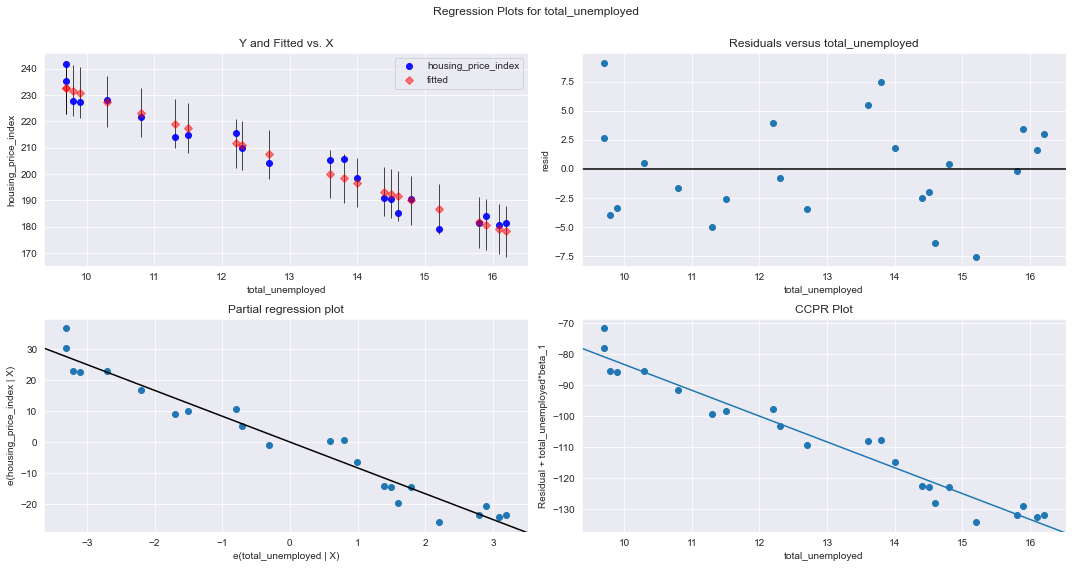

In [8]:

# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

#### Statsmodels Plots Explained
1. <b>First Plot</b>: The inverse relationship in our graph indicates that housing_price_index and total_unemployed are negatively correlated, i.e., when one variable increases the other decreases.

2. <b> Second Plot</b>: Shows Residuals or errors of the model. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

3. <b> Third Plot</b>: “Partial regression plot” shows the relationship between housing_price_index and total_unemployed, taking in to account the impact of adding other independent variables on our existing total_unemployed coefficient.

4. <b> 4th Plot </b>: shows where our trend line would lie after adding the impact of adding our other independent variables on our existing total_unemployed coefficient.

#### R squared vs Adjusted R Squared Error
R-squared measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model

Adjusted R-squared adjusts the statistic based on the number of independent variables in the model


### Multiple Linear Regression on same data

In [9]:
# again, invoke statsmodel's formula API using the below syntax
housing_model = ols("""housing_price_index ~ total_unemployed 
                                            + long_interest_rate 
                                            + federal_funds_rate
                                            + consumer_price_index 
                                            + gross_domestic_product""", data=df).fit()
# summarize our model
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Wed, 07 Oct 2020   Prob (F-statistic):           7.32e-14
Time:                         11:54:43   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

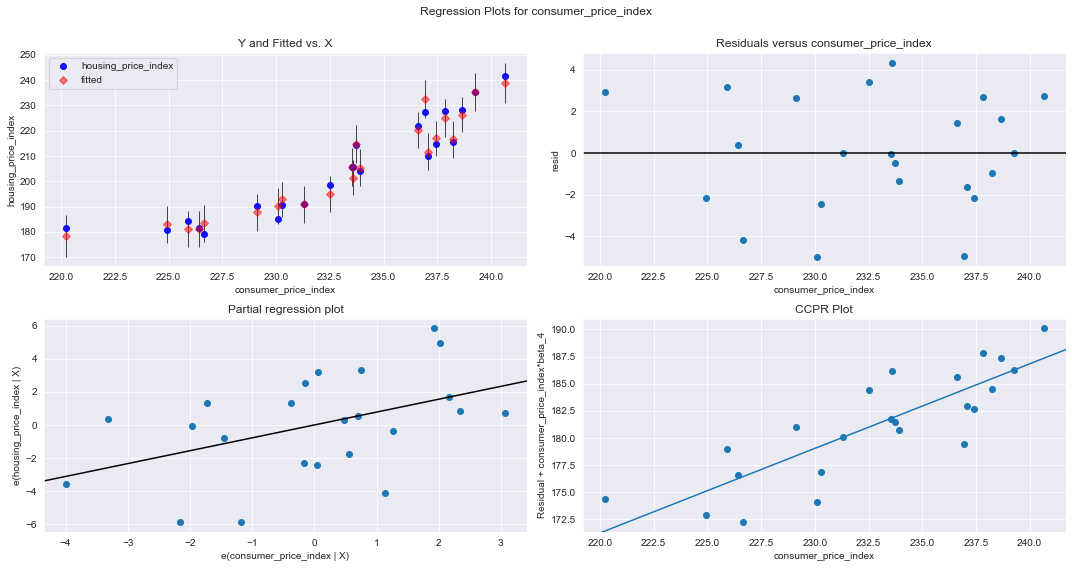

In [12]:
# Plots
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(housing_model,'consumer_price_index',fig=fig)


### Polynomial Regression
Let us look at that concerns Polynomial Regression - a new type of regression from what we have already seen.

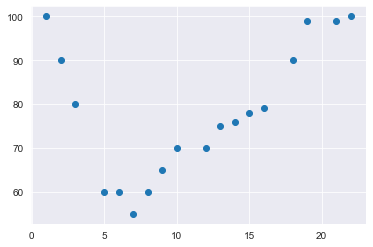

In [13]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

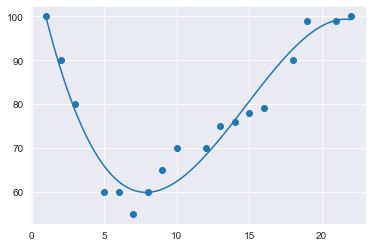

In [18]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [25]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))



0.9432150416451025


#### R Squared Value
above r-squared value suggests that polynomial regression is the right regression for the data

### Performing Polynomial Regression using sklearn

In [26]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Importing the dataset 
datas = pd.read_csv('data.csv') 
datas 

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [27]:
#seperate X and y
X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values 

In [28]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X, y) 

LinearRegression()

In [37]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression()

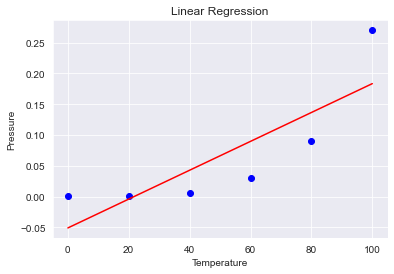

In [38]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

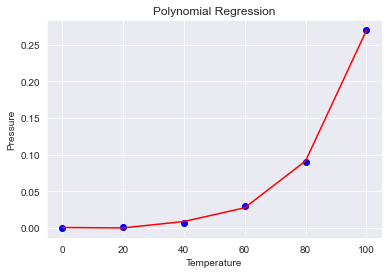

In [39]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 